In [4]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split



# Load the dataset
data = pd.read_csv('/home/dexter/filtring/front-end.csv')


In [5]:
data

,job_title,salary_range,posted_date
0,Front-end Developer,"£40,000 - £70,000",2024-05-10
1,Front-end Developer,"£40,000 - £70,000",2024-04-28
2,Front-end Developer,"£40,000 - £70,000",2024-04-15
3,Front-end Developer,"£40,000 - £70,000",2024-03-30
4,Front-end Developer,"£40,000 - £70,000",2024-03-15
...,...,...,...
61,Front-end Developer,"£28,000 - £58,000",2021-09-15
62,Front-end Developer,"£28,000 - £58,000",2021-08-30
63,Front-end Developer,"£28,000 - £58,000",2021-08-15
64,Front-end Developer,"£28,000 - £58,000",2021-07-30


In [6]:
# Select the relevant column (date)
data = data[['posted_date']]

# Convert 'posted_date' to datetime objects
data['posted_date'] = pd.to_datetime(data['posted_date'])

# Sort data by date
data = data.sort_values('posted_date')

# Create a numerical representation of the dates (days since a reference date)
reference_date = data['posted_date'].min()
data['days_since'] = (data['posted_date'] - reference_date).dt.days

# Check for NaN values in 'days_since'
print("NaN values in 'days_since':", data['days_since'].isnull().sum())

# Drop rows with NaN values in 'days_since'
data = data.dropna(subset=['days_since'])

# Use only the 'days_since' column for prediction
date_data = data['days_since'].values.reshape(-1, 1)

# Check for NaN values
print("NaN values in date_data before scaling:", np.isnan(date_data).sum())

# Normalize date data
scaler = MinMaxScaler(feature_range=(0, 1))
date_data = scaler.fit_transform(date_data)

# Check for NaN values after scaling
print("NaN values in date_data after scaling:", np.isnan(date_data).sum())

# If there are any NaN values after scaling, they need to be removed
nan_indices = np.isnan(date_data).flatten()
date_data = date_data[~nan_indices]

print("NaN values removed. New shape of date_data:", date_data.shape)


NaN values in 'days_since': 0
NaN values in date_data before scaling: 0
NaN values in date_data after scaling: 0
NaN values removed. New shape of date_data: (66, 1)


/tmp/ipykernel_29957/442334435.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['posted_date'] = pd.to_datetime(data['posted_date'])


In [7]:
# Prepare data for LSTM (create sequences)
look_back = 30  # Number of previous days to consider
X, Y = [], []
for i in range(look_back, len(date_data)):
    X.append(date_data[i - look_back:i])
    Y.append(date_data[i])

X = np.array(X)
Y = np.array(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Check for NaN values in X and Y
print("NaN values in X_train:", np.isnan(X_train).sum())
print("NaN values in Y_train:", np.isnan(Y_train).sum())
print("NaN values in X_test:", np.isnan(X_test).sum())
print("NaN values in Y_test:", np.isnan(Y_test).sum())

NaN values in X_train: 0
NaN values in Y_train: 0
NaN values in X_test: 0
NaN values in Y_test: 0


Epoch 1/100


/home/dexter/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 536450.0000 - val_loss: 700484.3125
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - loss: 536337.3750 - val_loss: 700337.6250
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step - loss: 536225.2500 - val_loss: 700187.6875
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - loss: 536110.5000 - val_loss: 700029.5000
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 535989.4375 - val_loss: 699857.1250
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 535857.6250 - val_loss: 699664.2500
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - loss: 535710.0625 - val_loss: 699443.6875
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss: 535541.1250 - val_loss: 699187.0000
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - loss: 535344.0625 - val_loss: 698884.0000
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - loss: 535110.5000 - val_loss: 698523.8750
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 5348

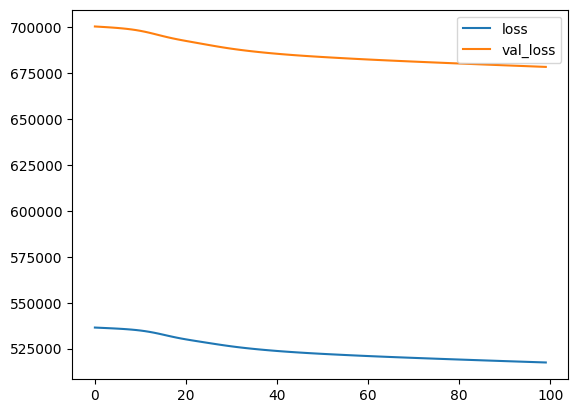

In [12]:
# Create the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)),
    tf.keras.layers.LSTM(units=50),
    tf.keras.layers.Dense(1)
])

# Use a smaller learning rate to check for numerical stability
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

# Train the model
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test))

# Save the model
model.save('lstm_front-end_prediction_model.h5')

# Plot the loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 623ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


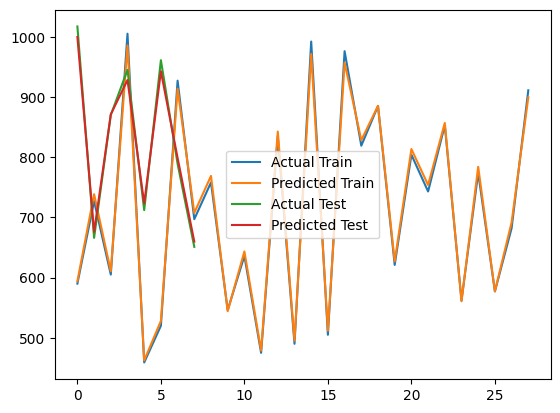

In [9]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions to get actual date values
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform(Y_train.reshape(-1, 1))  # Reshape to 2D array
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform(Y_test.reshape(-1, 1))  # Reshape to 2D array

# Plot training and test predictions
plt.plot(Y_train, label='Actual Train')
plt.plot(train_predict, label='Predicted Train')
plt.plot(Y_test, label='Actual Test')
plt.plot(test_predict, label='Predicted Test')
plt.legend()
plt.show()


In [13]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('lstm_front-end_prediction_model.h5')

# Recompile the model with the same loss and optimizer
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

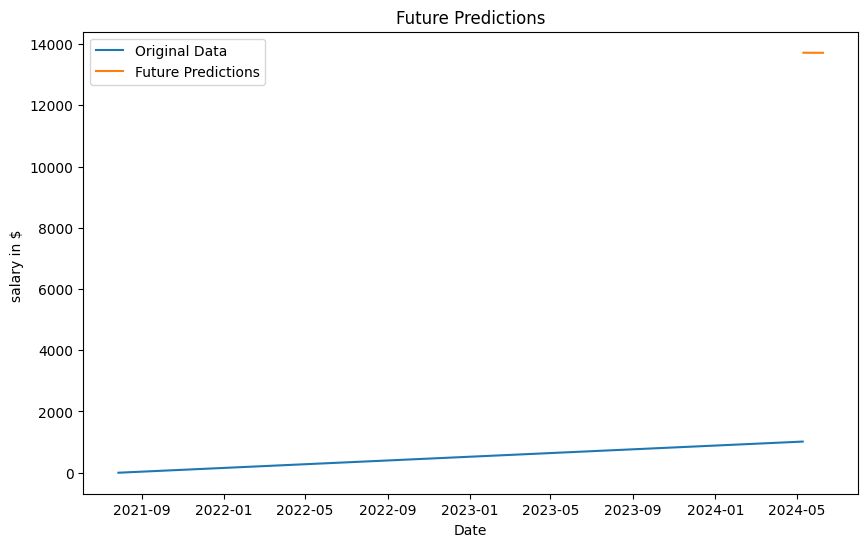

In [16]:
# Predict the next 30 days
future_days = 30
look_back = 30  # This should match the look_back value used during training
last_sequence = date_data[-look_back:]  # Get the last sequence to predict the next day

future_predictions = []
for _ in range(future_days):
    next_prediction = model.predict(last_sequence.reshape(1, look_back, 1))
    future_predictions.append(next_prediction[0, 0])
    # Update the last sequence with the new prediction
    last_sequence = np.append(last_sequence[1:], next_prediction)

# Invert the predictions to get actual date values
future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions = scaler.inverse_transform(future_predictions)

# Generate future dates
last_date = data['posted_date'].max()
future_dates = pd.date_range(last_date, periods=future_days + 1, inclusive='right')

# Plot the future predictions
plt.figure(figsize=(10, 6))
plt.plot(data['posted_date'], data['days_since'], label='Original Data')
plt.plot(future_dates, future_predictions, label='Future Predictions')
plt.legend()
plt.xlabel('Date')
plt.ylabel('salary in $ ')
plt.title('Future Predictions')
plt.show()
